# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/StartupCampus/bukapedia.csv')
df.head()

,category,city,gold_merchant,image_url,jumlah_review,jumlah_view,location,presentase_diskon,price,product_id,quantity_sold_new,rating,shop_name,subcategory,title,url
0,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,954,0,Kota Bandung,0,55000,284008675,0,5,Openshop,Blouse,Baju Atasan Blouse Wanita Baju Muslim Blus Mus...,https://www.tokopedia.com/openols/baju-atasan-...
1,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,761,0,Kota Bandung,0,65000,283976385,0,5,Openshop,Blouse,Baju Atasan Wanita Magali Tunik Blouse Baju Mu...,https://www.tokopedia.com/openols/baju-atasan-...
2,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,439,0,Jakarta,0,59000,316717554,0,5,joZFashion,Piyama,Piyama Black Cat Daster Baju Tidur Wanita Dewasa,https://www.tokopedia.com/wjozfashion/piyama-b...
3,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,909,0,Kota Bandung,0,59000,270887764,0,5,Openshop,Blouse,Tunik Atasan Wanita Blouse Baju Muslim Blus Mu...,https://www.tokopedia.com/openols/tunik-atasan...
4,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,614,0,Kota Bandung,0,55000,284010469,0,5,Openshop,Blouse,Atasan Wanita Ellena Peplum Blouse Tunik Baju ...,https://www.tokopedia.com/openols/atasan-wanit...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4503 entries, 0 to 4502
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           4503 non-null   object
 1   city               4503 non-null   object
 2   gold_merchant      4503 non-null   bool  
 3   image_url          4503 non-null   object
 4   jumlah_review      4503 non-null   int64 
 5   jumlah_view        4503 non-null   object
 6   location           4503 non-null   object
 7   presentase_diskon  4503 non-null   int64 
 8   price              4503 non-null   int64 
 9   product_id         4503 non-null   int64 
 10  quantity_sold_new  4503 non-null   int64 
 11  rating             4503 non-null   int64 
 12  shop_name          4503 non-null   object
 13  subcategory        4503 non-null   object
 14  title              4503 non-null   object
 15  url                4503 non-null   object
dtypes: bool(1), int64(6), object(9)
memory usa

# Cleansing Data

In [ ]:
df.isna().sum()

category             0
city                 0
gold_merchant        0
image_url            0
jumlah_review        0
jumlah_view          0
location             0
presentase_diskon    0
price                0
product_id           0
quantity_sold_new    0
rating               0
shop_name            0
subcategory          0
title                0
url                  0
dtype: int64

In [ ]:
df.duplicated().sum()

0

# Data Pre-Processing

## Drop Kolom Tidak Penting

In [ ]:
df = df.drop(columns=['city', 'category', 'image_url', 'presentase_diskon', 'title', 'url'])

In [ ]:
df.head()

,gold_merchant,jumlah_review,jumlah_view,location,price,product_id,quantity_sold_new,rating,shop_name,subcategory
0,True,954,0,Kota Bandung,55000,284008675,0,5,Openshop,Blouse
1,True,761,0,Kota Bandung,65000,283976385,0,5,Openshop,Blouse
2,False,439,0,Jakarta,59000,316717554,0,5,joZFashion,Piyama
3,True,909,0,Kota Bandung,59000,270887764,0,5,Openshop,Blouse
4,True,614,0,Kota Bandung,55000,284010469,0,5,Openshop,Blouse


## Label Encoding

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['gold_merchant'] = le.fit_transform(df['gold_merchant'])

In [ ]:
df.head()

,gold_merchant,jumlah_review,jumlah_view,location,price,product_id,quantity_sold_new,rating,shop_name,subcategory
0,1,954,0,Kota Bandung,55000,284008675,0,5,Openshop,Blouse
1,1,761,0,Kota Bandung,65000,283976385,0,5,Openshop,Blouse
2,0,439,0,Jakarta,59000,316717554,0,5,joZFashion,Piyama
3,1,909,0,Kota Bandung,59000,270887764,0,5,Openshop,Blouse
4,1,614,0,Kota Bandung,55000,284010469,0,5,Openshop,Blouse


## Mengubah Tipe Data yang Belum Sesuai

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4503 entries, 0 to 4502
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gold_merchant      4503 non-null   int64 
 1   jumlah_review      4503 non-null   int64 
 2   jumlah_view        4503 non-null   object
 3   location           4503 non-null   object
 4   price              4503 non-null   int64 
 5   product_id         4503 non-null   int64 
 6   quantity_sold_new  4503 non-null   int64 
 7   rating             4503 non-null   int64 
 8   shop_name          4503 non-null   object
 9   subcategory        4503 non-null   object
dtypes: int64(6), object(4)
memory usage: 351.9+ KB


In [ ]:
df['jumlah_view'] = df['jumlah_view'].apply(lambda x: x.replace(',', ''))
df['jumlah_view'] = df['jumlah_view'].astype(int)

In [ ]:
df.head()

,gold_merchant,jumlah_review,jumlah_view,location,price,product_id,quantity_sold_new,rating,shop_name,subcategory
0,1,954,0,Kota Bandung,55000,284008675,0,5,Openshop,Blouse
1,1,761,0,Kota Bandung,65000,283976385,0,5,Openshop,Blouse
2,0,439,0,Jakarta,59000,316717554,0,5,joZFashion,Piyama
3,1,909,0,Kota Bandung,59000,270887764,0,5,Openshop,Blouse
4,1,614,0,Kota Bandung,55000,284010469,0,5,Openshop,Blouse


## Menambahkan Fitur/Atribut Baru

In [ ]:
df['total_amount'] = df['quantity_sold_new'] * df['price']

In [ ]:
df.head()

,gold_merchant,jumlah_review,jumlah_view,location,price,product_id,quantity_sold_new,rating,shop_name,subcategory,total_amount
0,1,954,0,Kota Bandung,55000,284008675,0,5,Openshop,Blouse,0
1,1,761,0,Kota Bandung,65000,283976385,0,5,Openshop,Blouse,0
2,0,439,0,Jakarta,59000,316717554,0,5,joZFashion,Piyama,0
3,1,909,0,Kota Bandung,59000,270887764,0,5,Openshop,Blouse,0
4,1,614,0,Kota Bandung,55000,284010469,0,5,Openshop,Blouse,0


# **CLUSTERING**

In [ ]:
from sklearn.cluster import KMeans

## By Product ID

In [ ]:
df

,gold_merchant,jumlah_review,jumlah_view,location,price,product_id,quantity_sold_new,rating,shop_name,subcategory,total_amount
0,1,954,0,Kota Bandung,55000,284008675,0,5,Openshop,Blouse,0
1,1,761,0,Kota Bandung,65000,283976385,0,5,Openshop,Blouse,0
2,0,439,0,Jakarta,59000,316717554,0,5,joZFashion,Piyama,0
3,1,909,0,Kota Bandung,59000,270887764,0,5,Openshop,Blouse,0
4,1,614,0,Kota Bandung,55000,284010469,0,5,Openshop,Blouse,0
...,...,...,...,...,...,...,...,...,...,...,...
4498,0,33,0,Jakarta,131500,366339754,99,5,Toko Adela Aloysius,Sweater,13018500
4499,0,33,0,Jakarta,239900,363772675,99,5,Toko Wisly Wis,Jumpsuit,23750100
4500,0,31,0,Jakarta,105000,358247047,99,5,Strong Woman,Kemeja,10395000
4501,1,18,0,Kota Tangerang Selatan,50000,335503058,99,5,Michary Shop,Daster,4950000


In [ ]:
df

,gold_merchant,jumlah_review,jumlah_view,location,price,product_id,quantity_sold_new,rating,shop_name,subcategory,total_amount,cluster
0,1,954,0,Kota Bandung,55000,284008675,0,5,Openshop,Blouse,0,0
1,1,761,0,Kota Bandung,65000,283976385,0,5,Openshop,Blouse,0,0
2,0,439,0,Jakarta,59000,316717554,0,5,joZFashion,Piyama,0,0
3,1,909,0,Kota Bandung,59000,270887764,0,5,Openshop,Blouse,0,0
4,1,614,0,Kota Bandung,55000,284010469,0,5,Openshop,Blouse,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4498,0,33,0,Jakarta,131500,366339754,99,5,Toko Adela Aloysius,Sweater,13018500,0
4499,0,33,0,Jakarta,239900,363772675,99,5,Toko Wisly Wis,Jumpsuit,23750100,0
4500,0,31,0,Jakarta,105000,358247047,99,5,Strong Woman,Kemeja,10395000,0
4501,1,18,0,Kota Tangerang Selatan,50000,335503058,99,5,Michary Shop,Daster,4950000,0


### Model K-Means

In [ ]:
X = df[['jumlah_review', 'jumlah_view', 'quantity_sold_new', 'rating']].values

In [ ]:
X

array([[954,   0,   0,   5],
       [761,   0,   0,   5],
       [439,   0,   0,   5],
       ...,
       [ 31,   0,  99,   5],
       [ 18,   0,  99,   5],
       [ 66,   0,  99,   5]])

In [ ]:
# kmeans

model_kmeans = KMeans(n_clusters=4)
model_kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
model_kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
df['cluster'] = model_kmeans.labels_

### Hasil Prediksi

In [ ]:
df

,gold_merchant,jumlah_review,jumlah_view,location,price,product_id,quantity_sold_new,rating,shop_name,subcategory,total_amount,cluster
0,1,954,0,Kota Bandung,55000,284008675,0,5,Openshop,Blouse,0,0
1,1,761,0,Kota Bandung,65000,283976385,0,5,Openshop,Blouse,0,0
2,0,439,0,Jakarta,59000,316717554,0,5,joZFashion,Piyama,0,0
3,1,909,0,Kota Bandung,59000,270887764,0,5,Openshop,Blouse,0,0
4,1,614,0,Kota Bandung,55000,284010469,0,5,Openshop,Blouse,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4498,0,33,0,Jakarta,131500,366339754,99,5,Toko Adela Aloysius,Sweater,13018500,0
4499,0,33,0,Jakarta,239900,363772675,99,5,Toko Wisly Wis,Jumpsuit,23750100,0
4500,0,31,0,Jakarta,105000,358247047,99,5,Strong Woman,Kemeja,10395000,0
4501,1,18,0,Kota Tangerang Selatan,50000,335503058,99,5,Michary Shop,Daster,4950000,0


In [ ]:
df[df['cluster'] == 0]

,gold_merchant,jumlah_review,jumlah_view,location,price,product_id,quantity_sold_new,rating,shop_name,subcategory,total_amount,cluster
0,1,954,0,Kota Bandung,55000,284008675,0,5,Openshop,Blouse,0,0
1,1,761,0,Kota Bandung,65000,283976385,0,5,Openshop,Blouse,0,0
2,0,439,0,Jakarta,59000,316717554,0,5,joZFashion,Piyama,0,0
3,1,909,0,Kota Bandung,59000,270887764,0,5,Openshop,Blouse,0,0
4,1,614,0,Kota Bandung,55000,284010469,0,5,Openshop,Blouse,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4498,0,33,0,Jakarta,131500,366339754,99,5,Toko Adela Aloysius,Sweater,13018500,0
4499,0,33,0,Jakarta,239900,363772675,99,5,Toko Wisly Wis,Jumpsuit,23750100,0
4500,0,31,0,Jakarta,105000,358247047,99,5,Strong Woman,Kemeja,10395000,0
4501,1,18,0,Kota Tangerang Selatan,50000,335503058,99,5,Michary Shop,Daster,4950000,0


In [ ]:
df[df['cluster'] == 1]

,gold_merchant,jumlah_review,jumlah_view,location,price,product_id,quantity_sold_new,rating,shop_name,subcategory,total_amount,cluster
1509,1,39,16100,Jakarta,79000,162050500,104,4,CASHYUPHORIA SHOP,Kemeja,8216000,1
1568,0,57,25300,Jakarta,225000,208830382,116,4,AMALIA-SHOP,Batik Couple,26100000,1
1569,1,55,16500,Jakarta,79900,199071453,116,5,Pikoi_id,Blouse Batik,9268400,1
1702,0,70,15100,Jakarta,105000,227199422,146,5,endang pitrijani,Blouse,15330000,1
1722,1,65,16800,Kota Bandung,69999,55878400,166,4,AFWINDO Grosir Fashion,Blouse,11619834,1
1733,0,85,20900,Kota Surakarta,69900,96367530,182,4,Yuc Online Shopping,Vest,12721800,1
1748,1,102,25200,Kab. Pekalongan,68000,146513104,196,5,Batik Alita,Blouse,13328000,1
1752,1,95,15800,Kota Depok,58000,152392401,199,5,Nina Colecction,Daster,11542000,1
1754,0,94,23800,Kota Bandung,69000,187623040,200,4,rajagrosironline,Blouse,13800000,1
1762,1,94,22100,Kota Surabaya,72000,200114981,207,5,Paphika,Blouse,14904000,1


In [ ]:
df[df['cluster'] == 2]

,gold_merchant,jumlah_review,jumlah_view,location,price,product_id,quantity_sold_new,rating,shop_name,subcategory,total_amount,cluster
1834,1,123,47700,Jakarta,78000,33447414,277,4,CASHYUPHORIA SHOP,Kemeja,21606000,2
1835,1,115,44000,Kota Bandung,60000,222820000,286,4,Hijab Update,Kemeja,17160000,2
1936,0,224,43100,Jakarta,80000,42357283,474,4,Dress,Blouse,37920000,2
2057,1,551,69100,Kota Bandung,47000,210908812,1792,5,Openshop,Blouse,84224000,2
2059,1,442,55400,Kota Surakarta,20000,71957699,2690,4,Yona Retail,Daster,53800000,2
2060,1,1231,90600,Jakarta,53000,246580930,3969,5,Chel&#39;z Shop,Piyama,210357000,2


In [ ]:
# Function to visualize clusters
def clusters_stat(df):
    df_new = df.groupby(['cluster']).agg({
            'price'  : ['mean','median', 'min', 'max'],
            'jumlah_review'  : ['mean','median', 'min', 'max'],
            'jumlah_view': ['mean','median', 'min', 'max'],
            'quantity_sold_new' : ['mean','median', 'min', 'max'],
            'rating' : ['mean','median', 'min', 'max', 'count']
        }).round(0)

    return df_new

In [ ]:
clusters_stat(df).style.background_gradient(cmap='viridis')

#### Visualisasi Penyebaran Data

In [ ]:
kmeans = model_kmeans

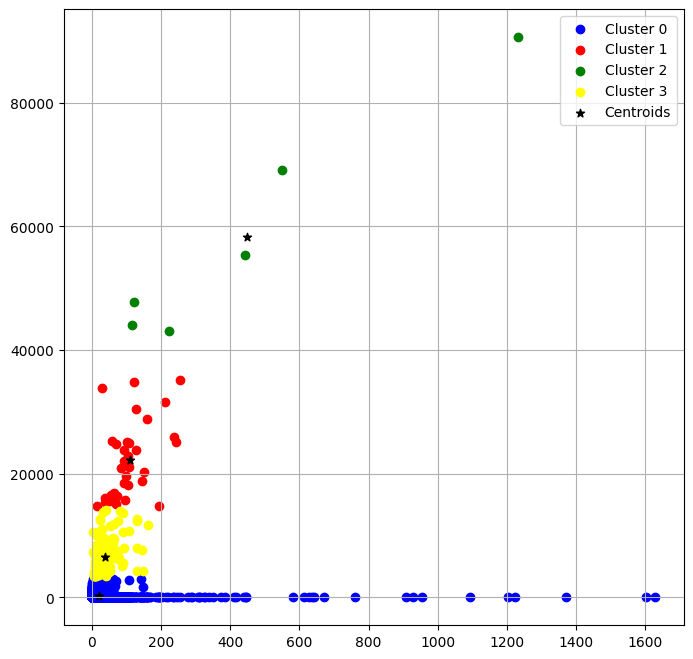

In [ ]:
plt.figure(figsize=(8,8))

plt.scatter(X[kmeans.labels_ == 0, 0], X[kmeans.labels_ == 0, 1],
            c='blue', label='Cluster 0')

plt.scatter(X[kmeans.labels_ == 1, 0], X[kmeans.labels_ == 1, 1],
            c='red', label='Cluster 1')

plt.scatter(X[kmeans.labels_ == 2, 0], X[kmeans.labels_ == 2, 1],
            c='green', label='Cluster 2')

plt.scatter(X[kmeans.labels_ == 3, 0], X[kmeans.labels_ == 3, 1],
            c='yellow', label='Cluster 3')

# plot centroid

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='*', c='black', label='Centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

#### Akurasi

In [ ]:
from sklearn import metrics

print(metrics.silhouette_score(X, model_kmeans.labels_))

0.9206487966137828


## By SubCategory product

### Feature Engineering

#### Jumlah Review

In [ ]:
review_subcategory = df.groupby('subcategory')[['jumlah_review']].sum()
review_subcategory

,jumlah_review
subcategory,
BRA,94
Backpack,5
Baju Couple,171
Batik Couple,247
Blazer,1134
Blouse,40136
Blouse Batik,1774
Bros,37
Cardigan,2670


#### Jumlah View

In [ ]:
view_subcategory = df.groupby('subcategory')[['jumlah_view']].sum()
view_subcategory

,jumlah_view
subcategory,
BRA,6500
Backpack,0
Baju Couple,3263
Batik Couple,34700
Blazer,7042
Blouse,789573
Blouse Batik,139039
Bros,496
Cardigan,12034


#### Quantity Sold

In [ ]:
qs_subcategory = df.groupby('subcategory')[['quantity_sold_new']].sum()
qs_subcategory

,quantity_sold_new
subcategory,
BRA,285
Backpack,5
Baju Couple,2259
Batik Couple,497
Blazer,4719
Blouse,78927
Blouse Batik,4597
Bros,48
Cardigan,5522


#### Rating

In [ ]:
rating_subcategory = df.groupby(['subcategory'])[['rating']].agg(pd.Series.mean)
rating_subcategory

,rating
subcategory,
BRA,5.000000
Backpack,5.000000
Baju Couple,5.000000
Batik Couple,4.846154
Blazer,4.956522
Blouse,4.866129
Blouse Batik,4.849315
Bros,5.000000
Cardigan,4.894737


#### Total Amount

In [ ]:
amount_subcategory = df.groupby('subcategory')[['total_amount']].sum()
amount_subcategory

,total_amount
subcategory,
BRA,8341500
Backpack,768200
Baju Couple,250768907
Batik Couple,95182000
Blazer,703872000
Blouse,7302467189
Blouse Batik,425451200
Bros,670000
Cardigan,333791777


### Merge

In [ ]:
by_subcategory = pd.merge(review_subcategory, view_subcategory, on='subcategory')
by_subcategory = pd.merge(by_subcategory, qs_subcategory, on='subcategory')
by_subcategory = pd.merge(by_subcategory, rating_subcategory, on='subcategory')
by_subcategory = pd.merge(by_subcategory, amount_subcategory, on='subcategory')
by_subcategory

,jumlah_review,jumlah_view,quantity_sold_new,rating,total_amount
subcategory,,,,,
BRA,94,6500,285,5.000000,8341500
Backpack,5,0,5,5.000000,768200
Baju Couple,171,3263,2259,5.000000,250768907
Batik Couple,247,34700,497,4.846154,95182000
Blazer,1134,7042,4719,4.956522,703872000
Blouse,40136,789573,78927,4.866129,7302467189
Blouse Batik,1774,139039,4597,4.849315,425451200
Bros,37,496,48,5.000000,670000
Cardigan,2670,12034,5522,4.894737,333791777


### Model K-Means

In [ ]:
X = by_subcategory[['jumlah_review', 'jumlah_view', 'quantity_sold_new', 'rating']].values

In [ ]:
X

array([[9.40000000e+01, 6.50000000e+03, 2.85000000e+02, 5.00000000e+00],
       [5.00000000e+00, 0.00000000e+00, 5.00000000e+00, 5.00000000e+00],
       [1.71000000e+02, 3.26300000e+03, 2.25900000e+03, 5.00000000e+00],
       [2.47000000e+02, 3.47000000e+04, 4.97000000e+02, 4.84615385e+00],
       [1.13400000e+03, 7.04200000e+03, 4.71900000e+03, 4.95652174e+00],
       [4.01360000e+04, 7.89573000e+05, 7.89270000e+04, 4.86612903e+00],
       [1.77400000e+03, 1.39039000e+05, 4.59700000e+03, 4.84931507e+00],
       [3.70000000e+01, 4.96000000e+02, 4.80000000e+01, 5.00000000e+00],
       [2.67000000e+03, 1.20340000e+04, 5.52200000e+03, 4.89473684e+00],
       [2.79000000e+02, 2.89000000e+04, 1.20100000e+03, 5.00000000e+00],
       [2.10000000e+01, 2.60000000e+03, 4.10000000e+01, 4.66666667e+00],
       [2.80000000e+01, 1.70000000e+04, 6.00000000e+01, 4.50000000e+00],
       [5.00000000e+01, 2.77200000e+03, 2.34000000e+02, 4.83333333e+00],
       [3.46000000e+02, 3.20000000e+04, 2.16000000e

In [ ]:
# kmeans

model_kmeans_1 = KMeans(n_clusters=4)
model_kmeans_1.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
model_kmeans_1.labels_

array([2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 3, 2, 2, 0, 2, 0, 0, 2, 3, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2], dtype=int32)

In [ ]:
by_subcategory['cluster'] = model_kmeans_1.labels_

### Hasil Prediksi

In [ ]:
by_subcategory

,jumlah_review,jumlah_view,quantity_sold_new,rating,total_amount,cluster
subcategory,,,,,,
BRA,94,6500,285,5.000000,8341500,2
Backpack,5,0,5,5.000000,768200,2
Baju Couple,171,3263,2259,5.000000,250768907,2
Batik Couple,247,34700,497,4.846154,95182000,2
Blazer,1134,7042,4719,4.956522,703872000,2
Blouse,40136,789573,78927,4.866129,7302467189,1
Blouse Batik,1774,139039,4597,4.849315,425451200,0
Bros,37,496,48,5.000000,670000,2
Cardigan,2670,12034,5522,4.894737,333791777,2


In [ ]:
by_subcategory[by_subcategory['cluster'] == 0]

,jumlah_review,jumlah_view,quantity_sold_new,rating,total_amount,cluster
subcategory,,,,,,
Blouse Batik,1774,139039,4597,4.849315,425451200,0
Kaos,6884,117951,18473,4.878525,1023208943,0
Lingerie,1748,74325,4096,4.822368,313055700,0
Maxi Dress,6373,89999,25505,4.947222,4071315334,0
Midi Dress,4389,73078,10357,4.928571,1729743223,0
Setelan,2240,88564,7692,4.775862,920553918,0
Sweater,4978,77755,41879,4.857143,2416214483,0


In [ ]:
by_subcategory[by_subcategory['cluster'] == 1]

,jumlah_review,jumlah_view,quantity_sold_new,rating,total_amount,cluster
subcategory,,,,,,
Blouse,40136,789573,78927,4.866129,7302467189,1


In [ ]:
by_subcategory[by_subcategory['cluster'] == 2]

,jumlah_review,jumlah_view,quantity_sold_new,rating,total_amount,cluster
subcategory,,,,,,
BRA,94,6500,285,5.000000,8341500,2
Backpack,5,0,5,5.000000,768200,2
Baju Couple,171,3263,2259,5.000000,250768907,2
Batik Couple,247,34700,497,4.846154,95182000,2
Blazer,1134,7042,4719,4.956522,703872000,2
Bros,37,496,48,5.000000,670000,2
Cardigan,2670,12034,5522,4.894737,333791777,2
Celana Dalam,279,28900,1201,5.000000,93050000,2
Celana Jeans,21,2600,41,4.666667,3892000,2


In [ ]:
# Function to visualize clusters
def clusters_stat(by_subcategory):
    by_subcategory_new = by_subcategory.groupby(['cluster']).agg({
            'jumlah_review'  : ['mean','median', 'min', 'max'],
            'jumlah_view': ['mean','median', 'min', 'max'],
            'quantity_sold_new' : ['mean','median', 'min', 'max'],
            'rating' : ['mean','median', 'min', 'max', 'count']
        }).round(0)

    return by_subcategory_new

In [ ]:
clusters_stat(by_subcategory).style.background_gradient(cmap='viridis')

#### Visualisasi Penyebaran Data

In [ ]:
kmeans1 = model_kmeans_1

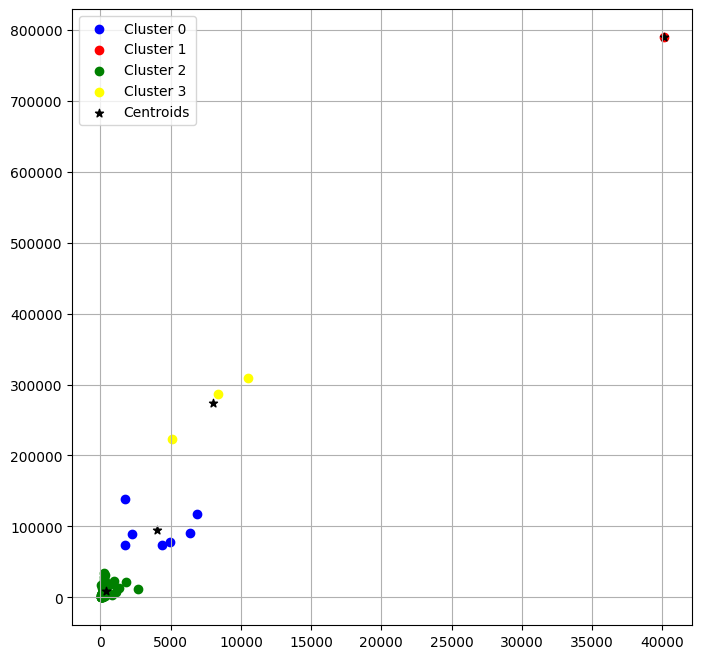

In [ ]:
plt.figure(figsize=(8,8))

plt.scatter(X[kmeans1.labels_ == 0, 0], X[kmeans1.labels_ == 0, 1],
            c='blue', label='Cluster 0')

plt.scatter(X[kmeans1.labels_ == 1, 0], X[kmeans1.labels_ == 1, 1],
            c='red', label='Cluster 1')

plt.scatter(X[kmeans1.labels_ == 2, 0], X[kmeans1.labels_ == 2, 1],
            c='green', label='Cluster 2')

plt.scatter(X[kmeans1.labels_ == 3, 0], X[kmeans1.labels_ == 3, 1],
            c='yellow', label='Cluster 3')

# plot centroid

plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1],
            marker='*', c='black', label='Centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

#### Akurasi

In [ ]:
print(metrics.silhouette_score(X, model_kmeans_1.labels_))

0.7857407282518494


## By Shop Name

### Feature Engineering

#### Gold Merchant

In [ ]:
gold_shop_name = df.groupby('shop_name')[['gold_merchant']].agg(pd.Series.mode)
gold_shop_name

,gold_merchant
shop_name,
21gillionscollection,0
22 Fashion Holic,1
3ceg,0
8teen_cloth,1
AA Kasimura,1
...,...
wiloo,1
win allolshop,1
www.grosirdress.com,1


#### Jumlah Review

In [ ]:
review_shop_name = df.groupby('shop_name')[['jumlah_review']].sum()
review_shop_name

,jumlah_review
shop_name,
21gillionscollection,4
22 Fashion Holic,3
3ceg,52
8teen_cloth,21
AA Kasimura,166
...,...
wiloo,124
win allolshop,25
www.grosirdress.com,36


#### Jumlah View

In [ ]:
view_shop_name = df.groupby('shop_name')[['jumlah_view']].sum()
view_shop_name

,jumlah_view
shop_name,
21gillionscollection,0
22 Fashion Holic,0
3ceg,0
8teen_cloth,0
AA Kasimura,11400
...,...
wiloo,1130
win allolshop,0
www.grosirdress.com,1000


#### Quantity Sold

In [ ]:
qs_shop_name = df.groupby('shop_name')[['quantity_sold_new']].sum()
qs_shop_name

,quantity_sold_new
shop_name,
21gillionscollection,0
22 Fashion Holic,1
3ceg,175
8teen_cloth,0
AA Kasimura,562
...,...
wiloo,225
win allolshop,8
www.grosirdress.com,51


#### Rating

In [ ]:
rating_shop_name = df.groupby(['shop_name'])[['rating']].agg(pd.Series.mean)
rating_shop_name

,rating
shop_name,
21gillionscollection,5.000000
22 Fashion Holic,5.000000
3ceg,4.000000
8teen_cloth,4.333333
AA Kasimura,5.000000
...,...
wiloo,4.926829
win allolshop,4.666667
www.grosirdress.com,4.666667


#### Total Amount

In [ ]:
amount_shop_name = df.groupby('shop_name')[['total_amount']].sum()
amount_shop_name

,total_amount
shop_name,
21gillionscollection,0
22 Fashion Holic,52000
3ceg,9625000
8teen_cloth,0
AA Kasimura,30312000
...,...
wiloo,27067000
win allolshop,328000
www.grosirdress.com,3548000


### Merge

In [ ]:
by_shop_name = pd.merge(review_shop_name, view_shop_name, on='shop_name')
by_shop_name = pd.merge(by_shop_name, qs_shop_name, on='shop_name')
by_shop_name = pd.merge(by_shop_name, rating_shop_name, on='shop_name')
by_shop_name = pd.merge(by_shop_name, amount_shop_name, on='shop_name')
by_shop_name = pd.merge(by_shop_name, gold_shop_name, on='shop_name')
by_shop_name

,jumlah_review,jumlah_view,quantity_sold_new,rating,total_amount,gold_merchant
shop_name,,,,,,
21gillionscollection,4,0,0,5.000000,0,0
22 Fashion Holic,3,0,1,5.000000,52000,1
3ceg,52,0,175,4.000000,9625000,0
8teen_cloth,21,0,0,4.333333,0,1
AA Kasimura,166,11400,562,5.000000,30312000,1
...,...,...,...,...,...,...
wiloo,124,1130,225,4.926829,27067000,1
win allolshop,25,0,8,4.666667,328000,1
www.grosirdress.com,36,1000,51,4.666667,3548000,1


### Model K-Means

In [ ]:
X = by_shop_name[['jumlah_review', 'jumlah_view', 'rating', 'quantity_sold_new']].values

In [ ]:
X

array([[   4.        ,    0.        ,    5.        ,    0.        ],
       [   3.        ,    0.        ,    5.        ,    1.        ],
       [  52.        ,    0.        ,    4.        ,  175.        ],
       ...,
       [  36.        , 1000.        ,    4.66666667,   51.        ],
       [   2.        ,    0.        ,    5.        ,    3.        ],
       [   4.        ,    0.        ,    5.        ,    6.        ]])

In [ ]:
# kmeans

model_kmeans_2 = KMeans(n_clusters=4)
model_kmeans_2.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
model_kmeans_2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,

In [ ]:
by_shop_name['cluster'] = model_kmeans_2.labels_

### Hasil Prediksi

In [ ]:
by_shop_name

,jumlah_review,jumlah_view,quantity_sold_new,rating,total_amount,gold_merchant,cluster
shop_name,,,,,,,
21gillionscollection,4,0,0,5.000000,0,0,0
22 Fashion Holic,3,0,1,5.000000,52000,1,0
3ceg,52,0,175,4.000000,9625000,0,0
8teen_cloth,21,0,0,4.333333,0,1,0
AA Kasimura,166,11400,562,5.000000,30312000,1,0
...,...,...,...,...,...,...,...
wiloo,124,1130,225,4.926829,27067000,1,0
win allolshop,25,0,8,4.666667,328000,1,0
www.grosirdress.com,36,1000,51,4.666667,3548000,1,0


In [ ]:
by_shop_name[by_shop_name['cluster'] == 0]

,jumlah_review,jumlah_view,quantity_sold_new,rating,total_amount,gold_merchant,cluster
shop_name,,,,,,,
21gillionscollection,4,0,0,5.000000,0,0,0
22 Fashion Holic,3,0,1,5.000000,52000,1,0
3ceg,52,0,175,4.000000,9625000,0,0
8teen_cloth,21,0,0,4.333333,0,1,0
AA Kasimura,166,11400,562,5.000000,30312000,1,0
...,...,...,...,...,...,...,...
wiloo,124,1130,225,4.926829,27067000,1,0
win allolshop,25,0,8,4.666667,328000,1,0
www.grosirdress.com,36,1000,51,4.666667,3548000,1,0


In [ ]:
by_shop_name[by_shop_name['cluster'] == 1]

,jumlah_review,jumlah_view,quantity_sold_new,rating,total_amount,gold_merchant,cluster
shop_name,,,,,,,
Chel&#39;z Shop,2349,154700,7586,5.000000,418855000,1,1
Parrot Computer,1591,150236,4546,4.813187,473261000,1,1


In [ ]:
by_shop_name[by_shop_name['cluster'] == 2]

,jumlah_review,jumlah_view,quantity_sold_new,rating,total_amount,gold_merchant,cluster
shop_name,,,,,,,
AMALIA-SHOP,59,25300,119,4.500000,26775000,0,2
Amelie Butik Wholesale,295,51721,611,4.923077,90047000,1,2
AsQueen shop,178,30400,463,4.733333,27756000,1,2
Batik Alita,371,30500,798,4.714286,54558000,1,2
CASHYUPHORIA SHOP,295,67200,723,4.454545,53357000,1,2
Dress,687,74400,1488,4.416667,119040000,0,2
Euro Bikini,270,28900,702,5.000000,16600000,1,2
GROSIR KOREAN FASHION,463,83800,956,4.600000,86247000,1,2
Glory Purple Shop,637,47295,1693,4.755556,101863000,1,2


In [ ]:
# Function to visualize clusters
def clusters_stat(by_shop_name):
    by_shop_name_new = by_shop_name.groupby(['cluster']).agg({
            'jumlah_review'  : ['mean','median', 'min', 'max'],
            'jumlah_view': ['mean','median', 'min', 'max'],
            'rating' : ['mean','median', 'min', 'max', 'count'],
            'quantity_sold_new' : ['mean','median', 'min', 'max']
        }).round(0)

    return by_shop_name_new

In [ ]:
clusters_stat(by_shop_name).style.background_gradient(cmap='viridis')

#### Visualisasi Penyebaran Data

In [ ]:
kmeans2 = model_kmeans_2

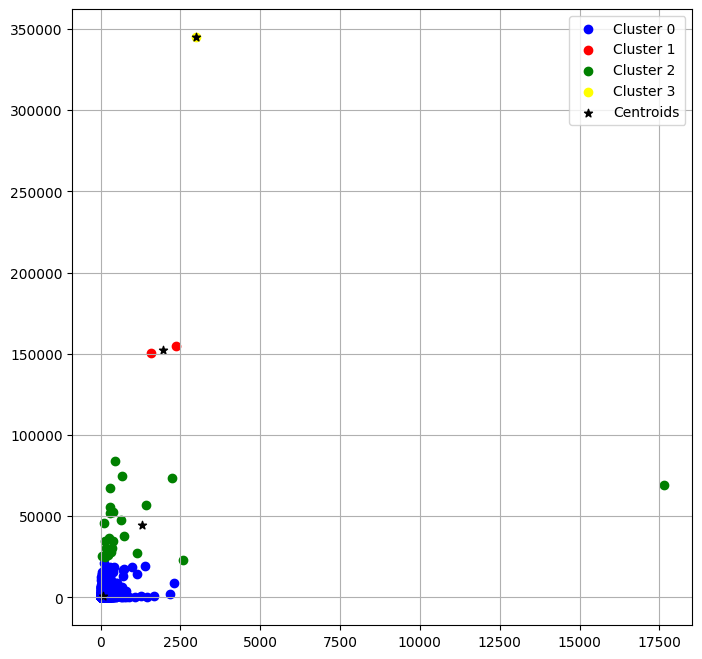

In [ ]:
plt.figure(figsize=(8,8))

plt.scatter(X[kmeans2.labels_ == 0, 0], X[kmeans2.labels_ == 0, 1],
            c='blue', label='Cluster 0')

plt.scatter(X[kmeans2.labels_ == 1, 0], X[kmeans2.labels_ == 1, 1],
            c='red', label='Cluster 1')

plt.scatter(X[kmeans2.labels_ == 2, 0], X[kmeans2.labels_ == 2, 1],
            c='green', label='Cluster 2')

plt.scatter(X[kmeans2.labels_ == 3, 0], X[kmeans2.labels_ == 3, 1],
            c='yellow', label='Cluster 3')

# plot centroid

plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1],
            marker='*', c='black', label='Centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

#### Akurasi

In [ ]:
print(metrics.silhouette_score(X, model_kmeans_2.labels_))

0.9292910184515548
